In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae

%matplotlib inline

In [91]:
def normal_equation(X,y):
    X_b = np.c_[np.ones((len(X),1)),X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    return theta_best

In [89]:
def linear_func(X, alfa = None, beta = 0.0):
    if alfa is None:
        mean_value = np.mean(X)
        return [mean_value] * len(X)
    
    X_new = np.linspace(X.min(),X.max(),len(y))
    X_new_b = np.c_[np.ones((len(y),1)), X_new]
        
    return [alfa*x + beta for _, x in X_new_b]

In [90]:
def norm_equation_linear_func(X,y):
    X_new = np.linspace(X.min(),X.max(),len(y))
    X_new_b = np.c_[np.ones((len(y),1)), X_new]
    y_predict = X_new_b.dot(normal_equation(X,y))
    
    return y_predict

In [187]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

In [188]:
df = pd.read_csv(path)

In [197]:
df['ppm_fixed'] = df.ppm.map(lambda x: None if x < 0  else x).fillna(method='backfill')
df['date'] = pd.to_datetime(df.apply(lambda row: '{}-{}-{}'.format(int(row.year), int(row.month), int(row.day)) , axis = 1))

In [198]:
X = df.index
y = df.ppm_fixed

In [199]:
#X = 2* np.random.rand(100,1)
#y = 4+ 3*X + np.random.randn(100,1)

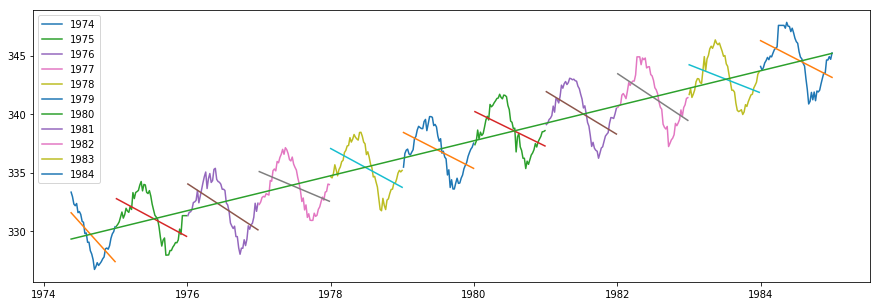

In [220]:
#idx = np.linspace(X.min(),X.max(),len(X))
plt.figure(figsize=(15,5))
year_min = 1974
year_max = 1985
for year in range(year_min, year_max):
    df_year = df[df.year == year]
    plt.plot(df_year.date, df_year.ppm_fixed, label=year)
    plt.plot(df_year.date, norm_equation_linear_func(df_year.index, df_year.ppm_fixed))

df_year = df[np.logical_and(df.year >= year_min, df.year < year_max)]
plt.plot(df_year.date, norm_equation_linear_func(df_year.index, df_year.ppm_fixed))    

plt.legend();